# Домашнее задание 2: библиотека Numpy и линейная алгебра

Импортируем библиотеки:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

from scipy import misc 

%matplotlib inline

*Вопросы для самопроверки:*
1. Что такое NumPy?
2. Зачем используется и почему работает быстрее?
3. Что такое линейная алгебра?
4. Как она связана с машинным обучением и глубоким обучением?

### Задание 1

В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета numpy и с ним.

In [2]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((100,100))
b = np.random.sample((100,100))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
# тут можно писать код 
print(a.ndim)
print(b.ndim)
print(a.shape)
print(b.shape)
# ========
print(a)
print(b)

2
2
(100, 100)
(100, 100)
[[0.98555796 0.2783906  0.80028437 ... 0.07896966 0.43849486 0.42647015]
 [0.83108099 0.59612759 0.36953771 ... 0.65311002 0.33035623 0.38247653]
 [0.49785155 0.26882039 0.21967333 ... 0.28792092 0.85340109 0.47291326]
 ...
 [0.89337385 0.01771121 0.53582481 ... 0.95613526 0.58578203 0.38969168]
 [0.8849392  0.95715991 0.89392022 ... 0.40369787 0.17369143 0.40545411]
 [0.06725    0.88204413 0.89498406 ... 0.62289465 0.94208152 0.12354368]]
[[0.76130086 0.93206912 0.19772074 ... 0.08449803 0.17034093 0.28611208]
 [0.77984225 0.49629297 0.17658882 ... 0.94585891 0.77115109 0.89228598]
 [0.79893958 0.73521929 0.58890502 ... 0.07753881 0.66986155 0.75002733]
 ...
 [0.4761796  0.94416397 0.68375682 ... 0.16269699 0.86917496 0.71154647]
 [0.91893434 0.01229536 0.38539779 ... 0.76368338 0.65637555 0.43558447]
 [0.06939816 0.86121789 0.58633647 ... 0.60826917 0.41294542 0.47854456]]


In [3]:
def mult(a, b):
    # здесь напишите перемножение матриц без 
    # использования NumPy и выведите результат
    c = [[0 for _ in range(a.shape[0])] for _ in range(b.shape[1])]
    for i in range(a.shape[0]):
        for k in range(b.shape[1]):
            for j in range(a.shape[1]):
                c[i][k] += a[i][j] * b[j][k]
    #print(c)

In [4]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    c = a @ b
    #print(c)

In [5]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

Wall time: 646 ms


In [6]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

Wall time: 33 ms


### Задание 2

Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.
Аналогично -- с помощью библиотеки NumPy и без нее. Сравните скорость, объясните результат.

In [7]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    # Ваш код здесь
    return np.cumsum(A) / np.arange(1, len(A)+1)

In [8]:
# функция без NumPy
def stupid_sec_av(A):
    S = [sum(A[:i+1])/(i+1) for i in range(len(A))]
# Ваш код здесь
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 3)

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 0 ns
Wall time: 80 ms


0.0

### Задание 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив $X$ с преобразованным $X$ и вывести в обратном порядке.

In [9]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    # Ваш код здесь
    Y = np.array(X[::-1])
    return Y

In [10]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X):
    # Ваш код здесь
    return Y

In [11]:
X = sps.uniform.rvs(size=10 ** 1) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
print(X)
print(S1)
#%time S2 = stupid_transformation(X)
# проверим корректность:
#np.abs(S1 - S2).sum()

Wall time: 0 ns
[0.15348677 0.2801245  0.73963376 0.33138771 0.80345827 0.57163307
 0.83526246 0.60863266 0.87571616 0.88705711]
[0.88705711 0.87571616 0.60863266 0.83526246 0.57163307 0.80345827
 0.33138771 0.73963376 0.2801245  0.15348677]


Что вы можете сказать о скорости вычислений в `NumPy`? Ответ обоснуйте.

**Ответ:**

### Задание 4

Вам подаются на вход два вектора `a` и `b` в трехмерном пространстве.Заполните их случайными числами. Реализуйте их скалярное произведение с помощью  `NumPy` и без. Засеките время работы, как это показано в заданиях выше.

In [12]:
a = #тут ваш код
b = #тут ваш код

SyntaxError: invalid syntax (<ipython-input-12-dd275d4f443b>, line 1)

In [13]:
def stupid_scalar_product(a,b):
    #тут ваш код

SyntaxError: unexpected EOF while parsing (<ipython-input-13-0ea4fe1972a7>, line 2)

In [14]:
def numpy_scalar_product(a,b):
    #тут ваш код

SyntaxError: unexpected EOF while parsing (<ipython-input-14-aec2cf41e3ab>, line 2)

In [15]:
%time product_1 = stupid_scalar_product(a,b)
%time product_2 = numpy_scalar_product(a,b)
# проверим корректность:
np.abs(product_1 - product_2).sum()

NameError: name 'stupid_scalar_product' is not defined

NameError: name 'numpy_scalar_product' is not defined

NameError: name 'product_1' is not defined

## Бонусная часть (в тесте вопросов по ней не будет)

Image = 2-D численный массив
(или 3-D: CT, MRI, 2D + time; 4-D, …)
В текущем задании, image == Numpy array (np.array)

In [16]:
pic = misc.face() #встроенная в библиотеку функция, которая загружает картинку с енотом

Выведите тип и размеры для переменной pic. Что лежит внутри?

In [17]:
print(pic.dtype, pic.shape)

uint8 (768, 1024, 3)


Если вы все сделали правильно, что для формы у вас выведется кортеж из трех чисел: (X, Y, 3). Предположите, откуда там 3?

**Ответ:**

С помощью функции ниже можно вывести изображение и посмотреть, что находится внутри:

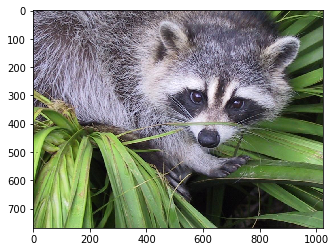

In [18]:
plt.imshow(pic)

Убедитесь, что внутри массива `pic` действительно лежат числа. Выведите первые 10 записей.
Массив состоит из троек чисел, которые характеризуют глубину цвета для каждого пикселя. Из пикселей складывается картинка.

In [19]:
print(pic[:10])

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ...
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ...

 [[ 68  68  80]
  [ 70  69  83]
  [ 67  66  80]
  ...
  [117 141  81]
  [120 146  85]
  [123 149  88]]

 [[102 102 114]
  [ 94  94 106]
  [ 85  84  98]
  ...
  [109 137  78]
  [ 98 126  67]
  [ 91 119  60]]

 [[123 123 135]
  [116 116 128]
  [108 108 120]
  ...
  [ 55  84  26]
  [ 47  76  18]
  [ 44  73  15]]]


Выведите значение максимального элемента в матрице. Выведите значение минимального. Выведите среднее по всем элементам матрице. В каких пределах лежат значения глубины цветов?

In [20]:
print(pic.max(), pic.min(), pic.mean(), pic.std())

255 0 110.16274388631184 57.508046744268405


## Задание 2

Теперь загрузим черно-белое изображение енота, чтобы наш массив был не 3-х мерным тензором, а двумерным массивом. Тензоры обрабатываются точно также, но для простоты пока что давайте работать с двумерными массивами, т.е. матрицами.

In [16]:
pic = misc.face(gray=True)

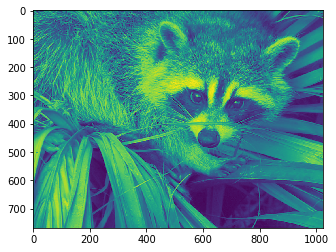

In [17]:
plt.imshow(pic)

Выведите форму (shape) полученной картинки `pic`. Какие выводы можно сделать? Положите в `h`,`w` высоту и ширину картинки.

In [18]:
print(pic.shape)
h,w=pic.shape

(768, 1024)


Используя библиотеку `numpy`, отразите изображение по горизонтали. Выведите картинку.

Подсказка: не забывайте, что изображения -- это просто двумерные массивы

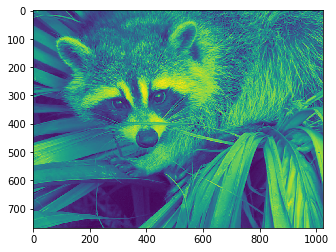

In [19]:
for i in range(len(pic)):
    pic[i]=pic[i][::-1]
plt.imshow(pic)

Теперь давайте повысим контрастность -- для этого к каждому пикселю прибавим 50 единиц

In [20]:
for i in range(len(pic)):
    pic[i]=[x+50 for x in pic[i]]

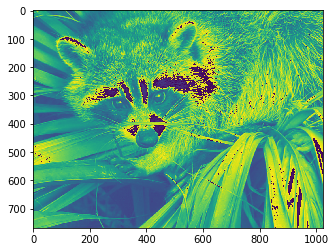

In [21]:
plt.imshow(pic)

Теперь давайте попробуем превратить наше одноканальное изображение в трехканальный (RGB) тензор. Для этого вместо каждого пикселя в одноканальном изображении (в двумерном массиве) поставим кортеж из трех элементов -- глубины красного, зеленого и голубого соотвественно. Восстановить по ч/б картинке цветной мы не можем, так как мы не можем взять утерянную информацию из ниоткуда, но можем усилить черные и белые участки. Для этого давайте заполним все три канала одинаковыми значениями, деленными на что-то очень большое. Например $--$ на $200$.  То есть, например, если в пикселе `pic[i][j]` лежало значение **200**, то для нового изображения `new_pic` мы заполняем `new_pic[i][j]` кортежем из трех чисел `int(pic[i][j]/3)`. Функция `int` $--$ округление до целой части.

In [22]:
new_pic = np.zeros((h,w,3)) #создадим пустую матрицу, куда будем записывать значения
for i in range(h):
    for j in range(w):
        new_pic[i][j][0] = int(pic[i][j]/200)
        new_pic[i][j][1] = int(pic[i][j]/200)
        new_pic[i][j][2] = int(pic[i][j]/200)

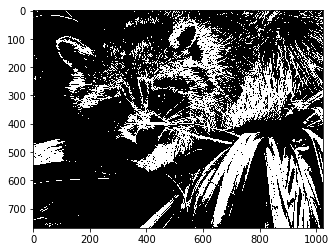

In [23]:
plt.imshow(new_pic)

## Задание 3

Теперь давайте уменьшим качество картинки в 16 раз, путем уменьшения качества изображения, т.е. теперь 16 пикселей по близости надо заполнить одним значением.

In [24]:
from sklearn.datasets import load_sample_image #импорт загрузчика изображения

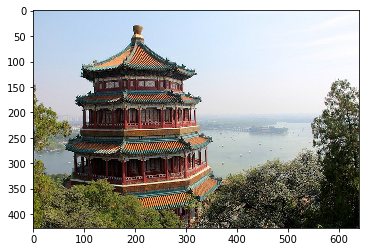

In [25]:
china = load_sample_image('china.jpg')
plt.imshow(china)

Запишите в переменные `h`, `w`, `c` высоту, ширину, количество каналов соответственно для картинки `china`.

In [26]:
h, w, c = china.shape
print(h, w, c)

427 640 3


Теперь давайте непосредственно перейдем к изменению картинки $--$ мы предлагаем разбивать картинки на квадраты 4 на 4 и заполнять все 16 значений внутри квадрата левым верхним значением. Вы можете сделать иначе.

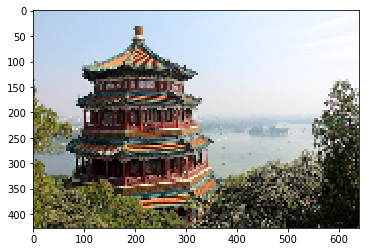

In [50]:
from copy import copy
compressed_pic = copy(china)

n = 4

for i in np.arange(0, h, n):
    for j in np.arange(0, w, n):
        for k in range(n):
            for l in range(n):
                if (i+k < h) and (j+l < w):
                    compressed_pic[i+k][j+l] = compressed_pic[i][j]
plt.imshow(compressed_pic);

Напишите функцию, которая считает несоотвествие между исходной и сжатой картинкой. Запустите ваш код для `compressed_pic`, `china`

In [51]:
def calculate_mismatch(a,b):
    mismatch=a - b
    print(mismatch)

In [52]:
calculate_mismatch(china, compressed_pic)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[254 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [  2   2   1]
  [  2   2   1]
  [  2   2   1]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  3   3   1]
  [  3   3   1]
  [  3   3   1]]

 ...

 [[  0   0   0]
  [ 59  58  62]
  [ 34  36  31]
  ...
  [240 242 239]
  [209 214 208]
  [207 212 206]]

 [[ 34  32  34]
  [ 41  40  46]
  [ 30  32  29]
  ...
  [210 212 209]
  [210 215 209]
  [217 224 215]]

 [[ 28  23  28]
  [ 16  13  24]
  [ 20  22  21]
  ...
  [244 249 245]
  [214 221 212]
  [216 224 213]]]


Посчитайте синус от каждого значения пикселей изображения `china` по всем каналам. Выведите картинку. Используйте функцию `np.sin` 

In [29]:
transform_picture=np.zeros((h,w,3))
for i in range(h):
    for j in range(w):
        for c in range(3):
            transform_picture[i][j][c] = np.sin(china[i][j][c])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


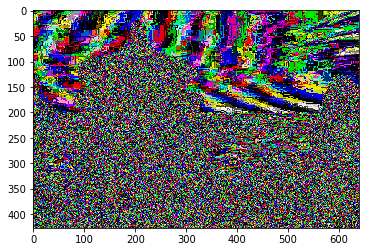

In [31]:
plt.imshow(transform_picture);

Посмотрите на полученный результат. Как вы думаете, что можно делать с помощью такого преобразования? Какого рода объекты можно распознать?

### Задание 4*
это задание является дополнительным

Теперь давайте поработаем с аудиофайлами. Стандартный аудиофайл представляет собой обычный набор чисел, в котором хранятся значения частот, снятых с определенной периодичностью. Итак, самая простая аудиодорожка $-$ одномерный массив.

Первое, что нужно сделать $--$ установить библиотеку для работы с аудио. Она называется `librosa`. Гайд по установке: https://librosa.github.io/librosa/install.html


In [2]:
import librosa #импортируем библиотеку
import IPython.display

In [64]:
audio, sr= librosa.load('Test.wav')  
# записываем наш массив звуковых частот в файл аудио, sr -- число точек, записываемых в секунду. 
# чтобы файл открылся, он должен лежать в той же папке, что и файл HW_2.ipynb

Нашу дорожку можно воспроизвести в самом файле `.ipynb`:

In [65]:
IPython.display.Audio(audio, rate=sr)

Выведите тип данных переменной `audio`, найдите ее длительность и среднее.

In [67]:
print(type(audio),'\n',audio.shape[0]/sr,'sec\n', audio.mean(),'kHz')

<class 'numpy.ndarray'> 
 5.572244897959184 sec
 -6.83587e-05 kHz


    Давайте посмотрим, как выглядит наша дорожка. Для этого используем библиотеку `matplotlib.pyplot`

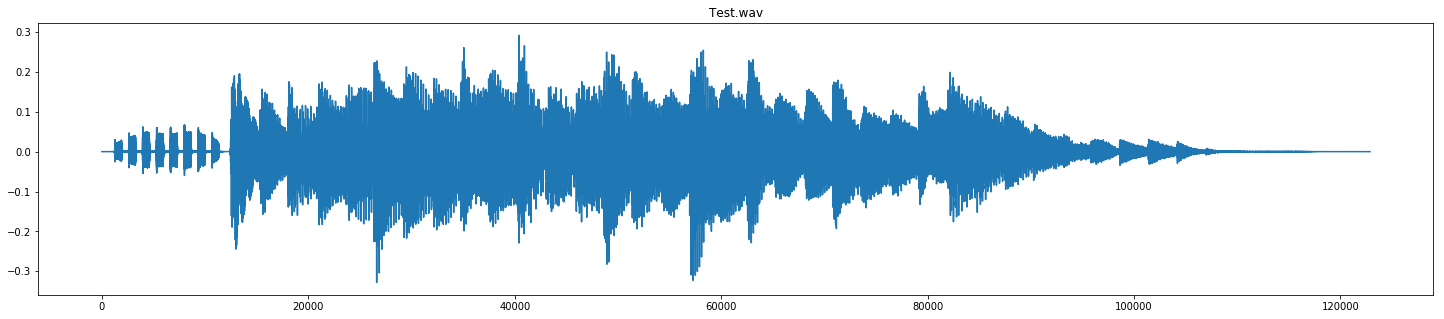

In [68]:
plt.figure(figsize=(25,5))
plt.title('Test.wav')
plt.plot(audio);

Обрежьте последние 4 секунды файла

In [69]:
audio = audio[:len(audio)-2*sr]

Давайте уменьшим амплитуду на 25%. Что при этом изменится? Напоминаю, что вы всегда можете послушать изменения при помощи `IPython.display.Audio`

In [71]:
print(type(audio),'\n', audio.shape[0]/sr, 'sec\n', audio.mean(),'kHz')

<class 'numpy.ndarray'> 
 3.572244897959184 sec
 -0.0012151 kHz


In [89]:
audio = audio * 0.1

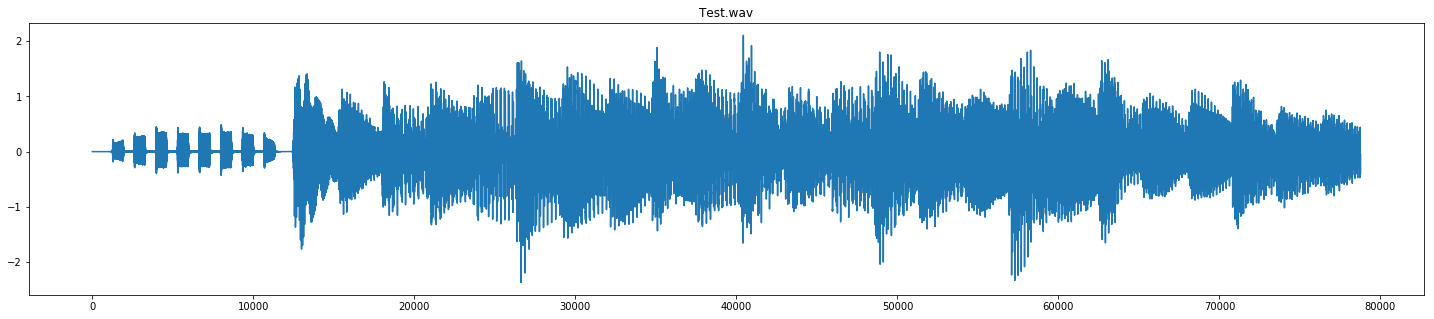

In [90]:
plt.figure(figsize=(25,5))
plt.title('Test.wav')
plt.plot(audio);

А еще аудиодорожку можно ускорить. Для этого попробуйте потюнить параметр `rate`

In [88]:
IPython.display.Audio(audio, rate=sr)